<h1>Izposojene knjige</h1>

<h2>Uvod</h2>
<p>S pomočjo knjižnice Pandas bom analizirala izposojene knjige v MKL v obdobju oktober 2019 - september 2020. Podatki so zbrani na strani [COBISS+](https://plus.cobiss.si/most-read-web/#libAcronym=MKL&libType&materialTypes=7&periodFrom=201910&periodTo=202009&pubType=1&publishYear), za vsako knjigo sem zajela naslov, avtorja, število izposoj, vrsto literature in jezik.</p>
<br>
<p>Knjige (avtor, naslov, jezik in število izposoj) so zbrane v datoteki knjige.csv, vrste gradiv skupaj z naslovi knjig pa v datoteki vrste.csv. Podatke sem s spletne strani dobila z zajemom s programom poberi_podatke.py ter orodja.py, kjer so funkcije, ki sem jih uporabila.</p>
<br>
<p>Delovne hipoteze:</p>
<ul>
<li>Knjige v slovenščini so bile večkrat izposojene kot knjige v tujih jezikih.</li>
<li>Največkrat izposojene knjige so romani.</li>
<li>Avtorji največkrat izposojenih knjig so različni.</li>
</ul>

<h2>Analiza podatkov</h2>
<p>Najprej uvozimo podatke:</p>

In [1]:
import pandas as pd
import os.path

pd.options.display.max_rows = 10
%matplotlib inline

pot_do_knjig = os.path.join('podatki', 'knjige.csv')
knjige = pd.read_csv(pot_do_knjig)
pot_do_vrst_literature = os.path.join('podatki', 'vrste.csv')
vrste_literature = pd.read_csv(pot_do_vrst_literature)

Poglejmo si podatke:

In [2]:
knjige

,izposoje,avtor,naslov,jezik
0,2030,Bronja Žakelj,Belo se pere na devetdeset,slovenski
1,1718,Tadej Golob,Dolina rož,slovenski
2,1405,Tadej Golob,Leninov park,slovenski
3,1286,Adam Kay,Tole bo bolelo : skrivni dnevnik mladega zdrav...,slovenski
4,1250,Tadej Golob,Jezero,slovenski
...,...,...,...,...
4915,1,Charles Bukowski,Ženske,slovenski
4916,1,Mantak Chia,Ženski orgazem brez meja : odkrijte svoje pože...,slovenski
4917,1,Siegfried Melchinger,Zgodovina političnega gledališča,slovenski
4918,1,Barbara Taylor,Življenje v vodi,slovenski


In [3]:
vrste_literature

,knjiga,vrsta
0,Belo se pere na devetdeset,življenjepis
1,Belo se pere na devetdeset,leposlovje za odrasle
2,Dolina rož,roman
3,Dolina rož,leposlovje za odrasle
4,Leninov park,roman
...,...,...
9794,Zgodovina političnega gledališča,neleposlovje za odrasle
9795,Življenje v vodi,strokovna monografija
9796,Življenje v vodi,neleposlovje za odrasle
9797,Žoga za rojstni dan : slikopis za učenje branja,slikanica


<p>Zdruzimo knjige s pripadajocimi vrstami literature:</p>

In [4]:
knjige_z_vrsto_literature = pd.merge(knjige, vrste_literature, left_on='naslov', right_on='knjiga')
knjige_z_vrsto_literature

,izposoje,avtor,naslov,jezik,knjiga,vrsta
0,2030,Bronja Žakelj,Belo se pere na devetdeset,slovenski,Belo se pere na devetdeset,življenjepis
1,2030,Bronja Žakelj,Belo se pere na devetdeset,slovenski,Belo se pere na devetdeset,leposlovje za odrasle
2,1718,Tadej Golob,Dolina rož,slovenski,Dolina rož,roman
3,1718,Tadej Golob,Dolina rož,slovenski,Dolina rož,leposlovje za odrasle
4,1405,Tadej Golob,Leninov park,slovenski,Leninov park,roman
...,...,...,...,...,...,...
9986,1,Siegfried Melchinger,Zgodovina političnega gledališča,slovenski,Zgodovina političnega gledališča,neleposlovje za odrasle
9987,1,Barbara Taylor,Življenje v vodi,slovenski,Življenje v vodi,strokovna monografija
9988,1,Barbara Taylor,Življenje v vodi,slovenski,Življenje v vodi,neleposlovje za odrasle
9989,1,Manfred Mai,Žoga za rojstni dan : slikopis za učenje branja,slovenski,Žoga za rojstni dan : slikopis za učenje branja,slikanica


<h3>Jezik</h3>
Knjige v slovenskem jeziku:

In [5]:
knjige[knjige.jezik == 'slovenski']

,izposoje,avtor,naslov,jezik
0,2030,Bronja Žakelj,Belo se pere na devetdeset,slovenski
1,1718,Tadej Golob,Dolina rož,slovenski
2,1405,Tadej Golob,Leninov park,slovenski
3,1286,Adam Kay,Tole bo bolelo : skrivni dnevnik mladega zdrav...,slovenski
4,1250,Tadej Golob,Jezero,slovenski
...,...,...,...,...
4915,1,Charles Bukowski,Ženske,slovenski
4916,1,Mantak Chia,Ženski orgazem brez meja : odkrijte svoje pože...,slovenski
4917,1,Siegfried Melchinger,Zgodovina političnega gledališča,slovenski
4918,1,Barbara Taylor,Življenje v vodi,slovenski


Knjige v tujih jezikih:

In [6]:
knjige[knjige.jezik != 'slovenski']

,izposoje,avtor,naslov,jezik
597,220,William Golding,Lord of the flies,angleški
617,215,Anne Collins,Where animals live,angleški
634,212,Coleen Degnan-Veness,The story of Spider-Man,angleški
651,209,Lynne Doherty Herndon,Peter and the wolf,angleški
655,208,Arthur Conan Doyle,Sherlock Holmes stories,angleški
...,...,...,...,...
4884,1,NaN,The Oxford dictionary of idioms,angleški
4898,1,David Krašovec,Valentin Metzinger : (1699-1759) : Lorenec na ...,"slovenski, francoski"
4900,1,Heinrich Decker,Venedig : Antlitz und Kunst der Stadt,nemški
4902,1,Maggie Alderson,Vruće pantalone,srbski


<AxesSubplot:xlabel='jezik'>

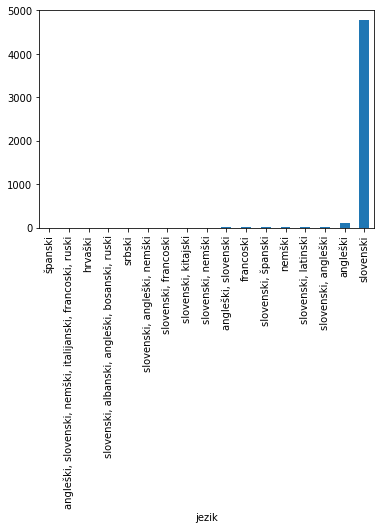

In [7]:
knjige.groupby('jezik').size().sort_values(ascending=True).plot.bar()

<AxesSubplot:xlabel='jezik'>

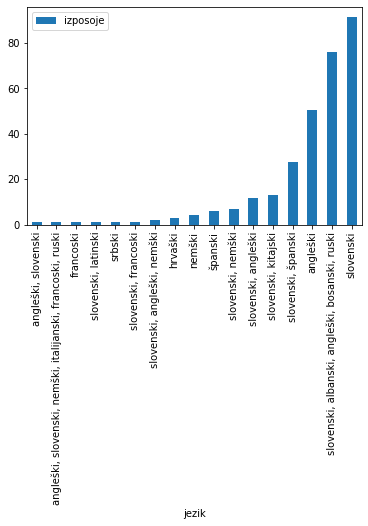

In [8]:
knjige.groupby('jezik').mean().sort_values('izposoje').plot.bar()

Prvi graf predstavlja število izposojenih knjig v posameznem jeziku, drugi graf pa povprečno število izposoj glede na jezik. Vidimo, da je bilo izposojenih največ knjig v slovenskem jeziku, ki imajo tudi najvišje povprečje izposoj.

In [9]:
knjige_z_vrsto_literature[knjige_z_vrsto_literature.jezik == 'slovenski'].groupby('vrsta').size().sort_values(ascending=False)

vrsta
leposlovje za odrasle          2081
roman                          1979
slikanica                       916
za šolske otroke (5-10 let)     850
neleposlovje za odrasle         666
                               ... 
književni prikaz/pregled          2
scenarij                          2
basni                             1
izpitno gradivo                   1
pisma                             1
Length: 38, dtype: int64

In [10]:
knjige_z_vrsto_literature[knjige_z_vrsto_literature.jezik != 'slovenski'].groupby('vrsta').size().sort_values(ascending=False)

vrsta
neleposlovje za odrasle        59
knjiga                         30
za šolske otroke (5-10 let)    27
učbenik                        27
slikanica                      27
                               ..
razne literarne vrste           1
strip                           1
izpitno gradivo                 1
humor, satira, parodija         1
delovni zvezek                  1
Length: 25, dtype: int64

<p>Vidimo tudi, da je največ izposojenih knjig v slovenskem jeziku vrste leposlovje za odrasle, v angleškem jeziku pa vrste neleposlovje za odrasle.</p>

<h3>Avtorji</h3>
Koliko knjig posameznega avtorja je bilo izposojenih?

In [11]:
knjige.groupby('avtor').size().sort_values(ascending=False)

avtor
Enid Blyton           32
Desa Muck             31
James Patterson       27
Svetlana Makarovič    26
Jim Davis             25
                      ..
Julia T. Wood          1
Julia Volmert          1
Julian Assange         1
Romy Hausmann          1
Kai Lüftner            1
Length: 2451, dtype: int64

<p>Vidimo, da je bilo največ izposojenih knjig avtorice Enid Blyton.
<br>Poglejmo, katere so te knjige.</p>

In [12]:
knjige_z_vrsto_literature[knjige_z_vrsto_literature.avtor == 'Enid Blyton'].groupby('vrsta').size().sort_values(ascending=False)

vrsta
za šolske otroke (9-14 let)    32
roman                          32
dtype: int64

In [13]:
knjige[knjige.avtor == 'Enid Blyton'][['naslov', 'izposoje']]

,naslov,izposoje
677,Skrivnih sedem,204
755,Skrivnost starega stolpa,191
797,Nagajivka Nika v šoli,181
887,"Skrivnih sedem, Pogumno naprej, Skrivnih sedem!",167
937,Skrivnost Šepetajočega otoka,157
...,...,...
1936,Na otoku zakladov,57
2235,Skrivnost tolpe Zelena roka,43
2285,Zaklad grajskih ječ,41
2414,Skrivnost hiše Ratatata,36


<p>Vidimo, da so vse knjige avtorice Enid Blyton romani za šolske otroke.</p>

In [14]:
knjige.groupby('avtor').mean().sort_values('izposoje', ascending=False)

,izposoje
avtor,
Bronja Žakelj,2030.0
Adam Kay,1286.0
Norman Ohler,1050.0
Rosie Walsh,970.0
Eduard Petiška,811.0
...,...
Ian Stewart,1.0
Jože Pogačnik,1.0
Marjan Smrke,1.0


In [15]:
knjige[knjige.avtor == "Bronja Žakelj"]

,izposoje,avtor,naslov,jezik
0,2030,Bronja Žakelj,Belo se pere na devetdeset,slovenski


<p>Največje povprečje izposoj glede na vse svoje izposojene knjige ima Bronja Žakelj, ki je avtorica le ene izposojene knjige in sicer prav največkrat izoposojene knjige.</p>

In [16]:
knjige.head(100).groupby("avtor").size().sort_values()

avtor
Adam Kay           1
Janez Mušič        1
Yasmina Reza       1
Joanne Ramos       1
Jonas Jonasson     1
                  ..
J. K. Rowling      3
Elena Ferrante     4
Julia Donaldson    5
Jojo Moyes         6
Jo Nesbø           6
Length: 64, dtype: int64

<AxesSubplot:xlabel='avtor'>

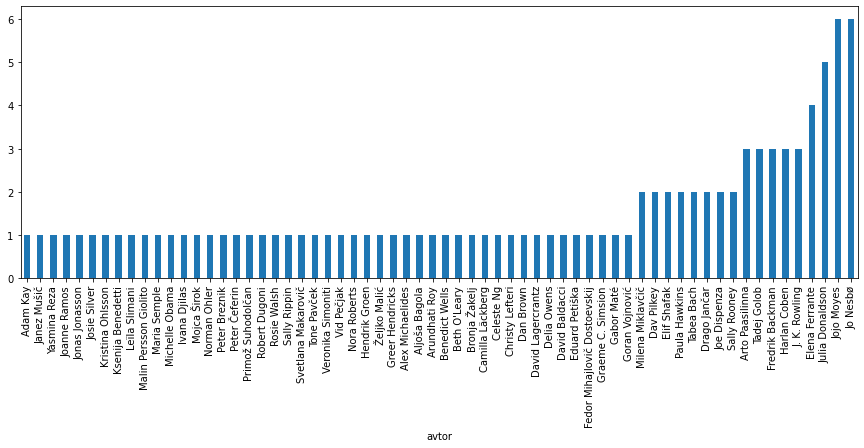

In [17]:
knjige.head(100).groupby("avtor").size().sort_values().plot.bar(figsize=(15,5))

<p>Izmed 100 največkrat izposojenih knjig, je največ 6 knjig istega avtorja. Teh 100 največkrat izposojenih knjig je napisalo 64 različnih avtorjev.</p>

<h3>Vrste literature</h3>
<p>Knjige katere vrste so bile največkrat izposojene?</p>

In [18]:
knjige_z_vrsto_literature.groupby("vrsta").size().sort_values(ascending=False)

vrsta
leposlovje za odrasle          2099
roman                          1995
slikanica                       943
za šolske otroke (5-10 let)     877
neleposlovje za odrasle         725
                               ... 
književni prikaz/pregled          2
scenarij                          2
delovni zvezek                    1
basni                             1
pisma                             1
Length: 40, dtype: int64

<AxesSubplot:xlabel='vrsta'>

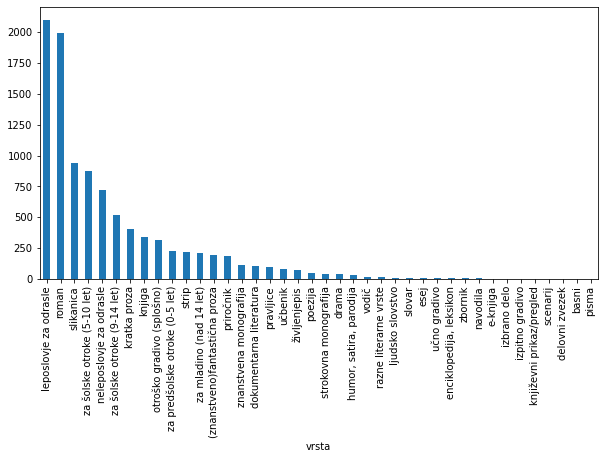

In [19]:
knjige_z_vrsto_literature.groupby("vrsta").size().sort_values(ascending=False).plot.bar(figsize=(10,5))

In [20]:
knjige_z_vrsto_literature.groupby("vrsta").mean("izposoje").sort_values("izposoje", ascending=False)

,izposoje
vrsta,
"humor, satira, parodija",154.529412
strip,154.481481
e-knjiga,150.666667
življenjepis,136.150685
leposlovje za odrasle,129.545974
...,...
basni,12.000000
učno gradivo,10.250000
slovar,9.800000


<p>Torej je bilo izposojenih največ knjig vrste leposlovje za odrasle, največje povprečje izposoj pa ima vrsta humor, satira, parodija.</p>

<h2>Zaključek</h2>
<p>Spomnimo se hipotez, ki smo jih postavili na začetku:</p>
<br>
<ol>
<li>Knjige v slovenščini so bile večkrat izposojene kot knjige v tujih jezikih.</li>
<li>Največkrat izposojene knjige so romani.</li>
<li>Avtorji največkrat izposojenih knjig so različni.</li>
</ol>
<br>
<p>Prvo hipotezo sem potrdila, saj je povprečje izposoj glede na jezik najvišje za knjige v slovenskem jeziku.
Drugo hipotezo sem ovrgla, saj so največkrat izposojene knjige vrste leposlovje za odrasle. Kljub temu s to ugotovitvijo nisem zadovoljna, saj je roman podpomenka leposlovja za odrasle. Hipoteza je bila neprimerno postavljena glede na pridobljene podatke. Tudi tretja hipoteza je neprimerno postavljena, saj je nenatancna. Morala bi biti bolj konkretno podana. Ugotovili pa smo, da je 100 največkrat izposojenih knjig napisalo 64 različnih avtorjev, isti avtor pa je napisal največ 6 izmed teh 100 knjig, zato bom tretjo hipotezo vseeno potrdila.</p>
<br>
<p>Moj sklep je, da so rezultati analize pričakovani, s tekom analize pa sem spoznala, da sem izbrala precej neprimerne oziroma nezanimive podatke za analizo. Analiza bi bila boljša, če bi vanjo vključila še več podatkov, kot so leto izdaje, vsebina knjige ipd.</p>

